# Lab 4

## import libs and connect to database

In [2]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [4]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [5]:
cur = conn.cursor()

# # Q1

In [6]:
sql_q1 = """
            select * from gp2.student
            """

In [8]:
df=pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,carte6jx@dukes.jmu.edu,Josie Carter,IA
1,traverm@dukes.jmu.edu,Matt Traver,IA
2,camicam@dukes.jmu.edu,Cami Cat,IA
3,SifDog@dukes.jmu.edu,Sif Carter,IA
4,s5@jmu.edu,s5,GS
5,s6@jmu.edu,s5,GS


## Q2

In [9]:
sql_q2 ="""
        select gp2.professor.p_name,
        gp2.course.c_name
        from gp2.professor
        inner join gp2.course
        on gp2.professor.p_email = gp2.course.p_email
        """

In [10]:
df=pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Stephen Marrin,Seminar IA Issue
1,Xuebin Wei,data mining
2,Timothy Walton,Hypothesis Test
3,Real Prof,Learning
4,Real Prof,Counterfactual


## Q3

In [11]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp2.enroll_list
        group by c_number
        order by enrolled desc
        """

In [12]:
df=pandas.read_sql_query(sql_q3,conn)
df[:]

,c_number,enrolled
0,IA261,3
1,IA313,3
2,IA340,2
3,IA300,2


<AxesSubplot:xlabel='c_number'>

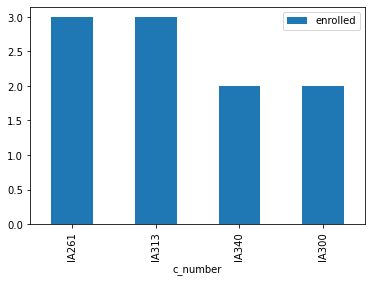

In [14]:
df=pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## Q4

In [15]:
sql_q4 ="""
        select gp2.professor.p_name,
        count(gp2.course.c_name) as teaching_number
        from gp2.professor
        inner join gp2.course
        on gp2.professor.p_email = gp2.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

In [16]:
df=pandas.read_sql_query(sql_q4,conn)
df[:]

,p_name,teaching_number
0,Real Prof,2
1,Timothy Walton,1
2,Xuebin Wei,1
3,Stephen Marrin,1


<AxesSubplot:xlabel='p_name'>

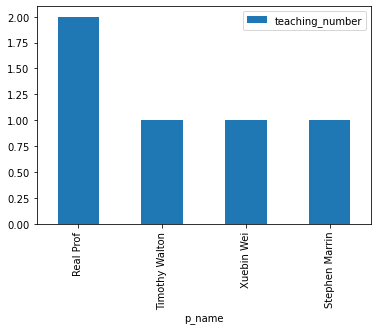

In [17]:
df=pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## Q5

In [18]:
sql_q5_professor ="""
                    insert into gp2.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p@jmu.edu','new_p','new_office')

In [19]:
cur.execute(sql_q5_professor)

In [20]:
conn.commit()

In [21]:
df=pandas.read_sql_query('select * from gp2.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,MSC 4102
1,marrinsp@jmu.edu,Stephen Marrin,MSC 4302
2,waltonr@jmu.edu,Timothy Walton,MSC 4304
3,therealone@jmu.edu,Real Prof,WW102
4,new_p@jmu.edu,new_p,new_office


In [22]:
sql_q5_course ="""
                    insert into gp2.course(c_number,c_name,p_email)
                    values('{}','{}','{}')
                    """.format('IA_new','new_C_name','new_p@jmu.edu')

In [23]:
cur.execute(sql_q5_course)

In [24]:
conn.commit()

In [25]:
df=pandas.read_sql_query('select * from gp2.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA300,Seminar IA Issue,ISAT 150,marrinsp@jmu.edu
1,IA340,data mining,ISAT 336,weixx@jmu.edu
2,IA261,Hypothesis Test,ISAT 336,waltonr@jmu.edu
3,IA500,Learning,WW1067,therealone@jmu.edu
4,IA313,Counterfactual,Engeo 1204,therealone@jmu.edu
5,IA_new,new_C_name,None,new_p@jmu.edu


## Q6

In [26]:
sql_q6_course ="""
                update gp2.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [27]:
cur.exectue(sql_q6_course)

AttributeError: 'psycopg2.extensions.cursor' object has no attribute 'exectue'

In [29]:
#cur.execute('ROLLBACK')

In [30]:
cur.execute(sql_q6_course)

In [31]:
conn.commit()

In [32]:
df=pandas.read_sql_query('select * from gp2.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA300,Seminar IA Issue,ISAT 150,marrinsp@jmu.edu
1,IA261,Hypothesis Test,ISAT 336,waltonr@jmu.edu
2,IA500,Learning,WW1067,therealone@jmu.edu
3,IA313,Counterfactual,Engeo 1204,therealone@jmu.edu
4,IA_new,new_C_name,None,new_p@jmu.edu
5,IA340,data mining,ISAT 336,new_p@jmu.edu


In [33]:
sql_q6_professor ="""
                delete from gp2.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [34]:
cur.execute(sql_q6_professor)

In [35]:
conn.commit()

In [36]:
df=pandas.read_sql_query('select * from gp2.professor',conn)
df[:]

,p_email,p_name,office
0,marrinsp@jmu.edu,Stephen Marrin,MSC 4302
1,waltonr@jmu.edu,Timothy Walton,MSC 4304
2,therealone@jmu.edu,Real Prof,WW102
3,new_p@jmu.edu,new_p,new_office


## close connection

In [37]:
cur.close()
conn.close()